<a href="https://colab.research.google.com/github/YUCAVALCANTE/pythontips/blob/main/Generating_Synthetic_Data_for_Stock_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Generating Synthetic Data for Stock Price Predictions

We begin by creating synthetic data that mimics stock price fluctuations over time, adding a bit of random noise to make the data more realistic.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Seed for reproducibility
np.random.seed(0)

# Generating dates and actual prices with noise
dates = pd.date_range(start='2024-01-01', periods=200, freq='D')
actual_prices = np.linspace(start=100, stop=300, num=200) + np.random.normal(0, 10, 200)

# Creating DataFrame to hold the data
df = pd.DataFrame(data={'Date': dates, 'Actual Price': actual_prices})

### Normalizing Data for Model Training

Normalization is a crucial preprocessing step. It adjusts the scale of our data, making it easier for the neural network to learn from it effectively.



In [16]:
# Normalize the prices to have zero mean and unit variance
df['Normalized Price'] = (df['Actual Price'] - df['Actual Price'].mean()) / df['Actual Price'].std()

# Preparing data for TensorFlow
train_data = df['Normalized Price'].values.reshape(-1, 1)

### Building and Compiling the TensorFlow Model

Here, we construct a simple neural network model with three layers to predict stock prices.

In [17]:
# Defining the model architecture
model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(10, activation='relu'),
    Dense(1)
])

# Compiling the model with the Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the Model

We train our model on the normalized data. This step is akin to "teaching" the model about the patterns in our stock price data.


In [18]:
# Fitting the model to the data
model.fit(train_data, train_data, epochs=200, verbose=0)

### Predicting and Visualizing the Results

After training, we use our model to predict stock prices and then visualize these predictions alongside the actual stock prices for comparison.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


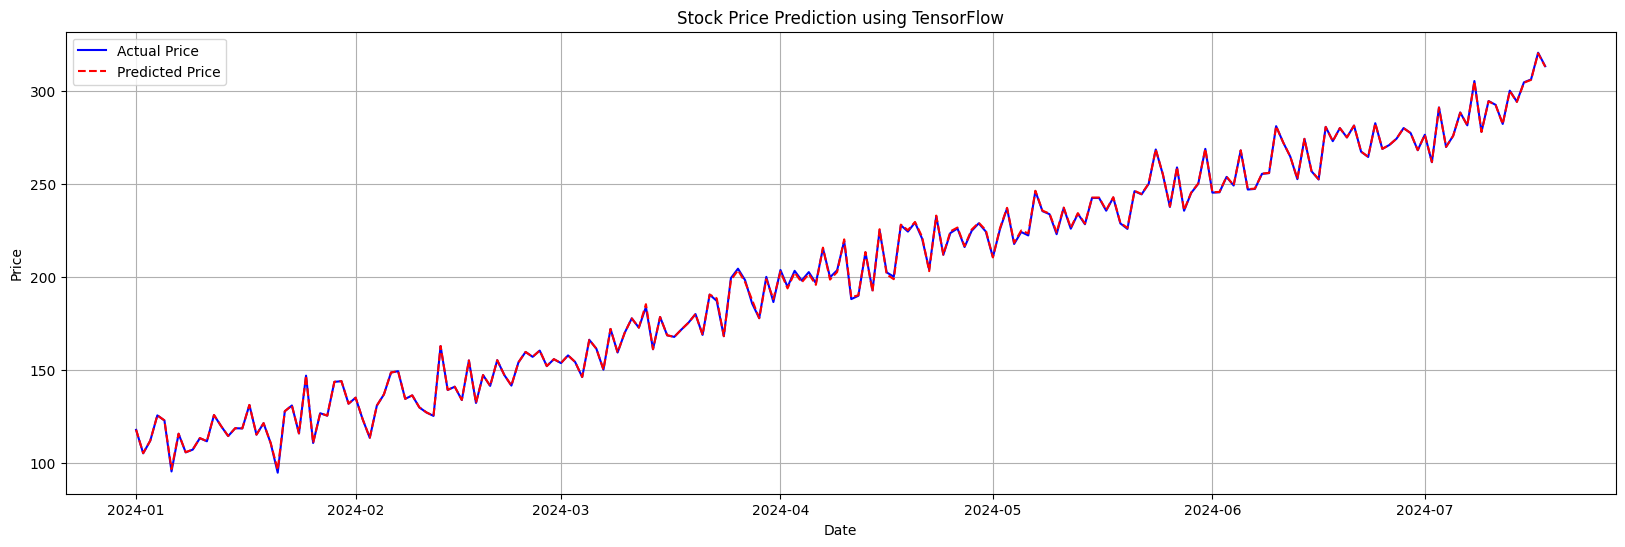

In [19]:
# Predicting the normalized prices
predicted_prices = model.predict(train_data).flatten()

# Denormalizing the predicted prices to the original price scale
predicted_prices = (predicted_prices * df['Actual Price'].std()) + df['Actual Price'].mean()

# Adding predicted prices to the DataFrame for visualization
df['Predicted Price'] = predicted_prices

# Plotting the actual vs predicted prices
plt.figure(figsize=(20, 6))
plt.plot(df['Date'], df['Actual Price'], label='Actual Price', color='blue', linestyle='-')
plt.plot(df['Date'], df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Stock Price Prediction using TensorFlow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### TensorFlow's Contribution to Stock Price Prediction

The chart below illustrates the effectiveness of TensorFlow in predicting stock prices over time. Here's a breakdown of what we observe from the graph and the contributions of TensorFlow:

1. **Accuracy in Prediction**:
   - The predictions, marked by the dashed red line, closely follow the actual stock prices, shown by the solid blue line. This close alignment indicates that the TensorFlow model has successfully captured the underlying trends and patterns in the stock price data.

2. **Adaptation to Market Fluctuations**:
   - The model's predictions track the actual data's fluctuations closely, suggesting that TensorFlow is sensitive and adaptive to market changes. This responsiveness is crucial for real-time financial analysis and trading strategies.

3. **Generalization Capability**:
   - The consistency of the model in tracking the trends over several months demonstrates its ability to generalize across different time periods. This is a significant advantage in financial modeling, where the ability to adapt to new, unseen market conditions is critical.

These insights confirm that TensorFlow is a powerful tool for predictive tasks in financial time series analysis. It offers robust capabilities for developing models that can learn complex data patterns and provide actionable insights for stock market decision-making.
